ANALISIS DE DATOS DEL DATASET HOUSING EXTRAIDO DE KAGGLE Y ANALIZADO POR DANIEL RAMIREZ 

se nos presenta una base de datos a analizar llamada housing , el archivo esta en un csv  y recopila informacion de viviendas , sus numeros de habitaciones , area, etc

importamos librerias

In [11]:
pip install Scikit-Learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression

Importamos el archivo 

In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Para el presente caso vamos a hacer un modelo de prediccion de precios en base a las variables numericas de las viviendas por ello tomamos como valores de los predictores el eje x (x_array) y como valores del eje y (y_array) los precios 

Definimos los arreglos 

In [23]:
x=df[['area','bedrooms','bathrooms','stories','parking']]

In [26]:
y=df['price']

se define el porcentaje de datos para entranimento haciendo uso de la libreria scikit learn que nos permite dividir los conjuntos de datos  en entrenamiento y en prueba, se divide el 70% de entrenamiento y el 30% de prueba

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

se construye en entrenamiento del modelo 

In [28]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

se evalua el algoritmo a traves de un modelo predictor que toma como entrada los datos del conjunto x_test y debe generar como resultado los datos del eje y 

In [29]:
predictions = model.predict(x_test)

este resultado se compara con los valores reales del conjunto y_test a traves de una grafica de dispersion 

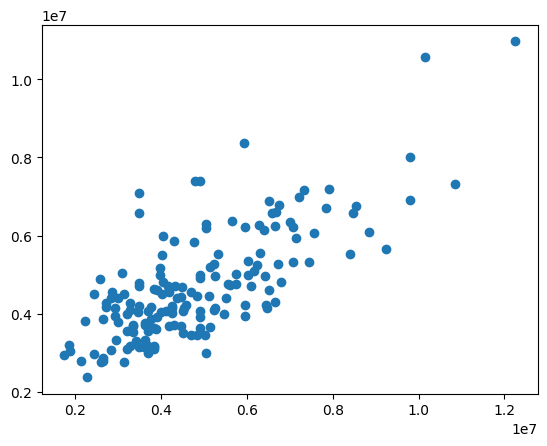

In [30]:
plt.scatter(y_test,predictions)

entendiendo este resultado se puede ver que este representa la distribucion de las predicciones y los datos reales, se esperaria que los datos siguieran una linea diagonal pero se obtuvo un resultado con los datos dispersos  por lo que debemos revisar las metricas del entrenamiento 

De igual manera se grafica el histograma de residuos es decir la diferencia entre el valor real y las predicciones del modelo 

(array([ 2.,  4., 10., 22., 39., 38., 26., 15.,  4.,  4.]),
 array([-3.58753288e+06, -2.86933011e+06, -2.15112734e+06, -1.43292457e+06,
        -7.14721795e+05,  3.48097593e+03,  7.21683747e+05,  1.43988652e+06,
         2.15808929e+06,  2.87629206e+06,  3.59449483e+06]),
 <BarContainer object of 10 artists>)

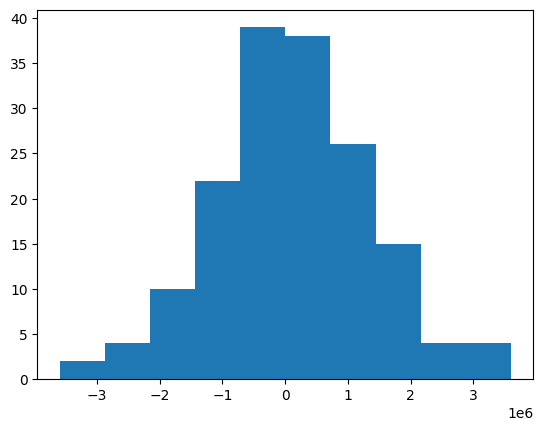

In [31]:
plt.hist(y_test-predictions)

Deberia obtenerse una distribucion normal pero se ve  una distribucion de los datos hacia la derecha , siguiendo con la evaluacion del modelo se muestran los valores de los errores

In [ ]:
metrics.mean_absolute_error(y_test, predictions) # Este es el error absoluto

950081.005671716

In [ ]:
metrics.mean_squared_error(y_test, predictions) # Error cuadratico medio 

1546869699332.184

In [37]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(1243732.165432809)

In [ ]:
La prediccion tiene un alto margen de error 